## CONTEXTO

Este estudo de caso tem como objetivo analisar o conjunto de dados Boston Housing Dataset, que reúne informações coletadas pelo serviço de Censo dos Estados Unidos sobre características de moradias na região de Boston, Massachusetts. A base contempla variáveis relacionadas a aspectos socioeconômicos, estruturais e geográficos, com foco nos principais fatores que influenciam os preços dos imóveis.

A proposta deste estudo é aplicar as técnicas de Análise Fatorial e Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, identificando fatores latentes que expliquem a variabilidade entre as variáveis originais. Em especial, será investigado se a variável relacionada ao valor do imposto sobre imóveis está alinhada com as características representadas por esses fatores, contribuindo para a compreensão dos elementos que impactam diretamente no valor das propriedades.

In [26]:
# Carregando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_palette('dark')
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_houses = pd.read_csv('../data/raw/Boston-house-price-data.csv')
df_houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df_houses.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Dicionário de dados
| Variável        | Tradução              |
|-----------------|------------------------|
| CRIM            | TAXA DE CRIMINALIDADE PER CAPITA       |
| ZN              | PROPORÇÃO DE GRANDES LOTES RESIDENCIAIS (ACIMA DE 25000 PÉS QUADRADOS)     |
| INDUS  | PROPORÇÃO DE HECTARES DE NEGÓCIOS NÃO VAREJISTAS POR CIDADE           |
| CHAS             | VARIÁVEL BINÁRIA QUE INDICA SE A PROPRIEDADE FICA PERTO DE CHARLES RIVER(RIO) (1-SIM,0-NÃO)    |
| NOX       | CONCENTRAÇÃO DE ÓXIDOS DE NITROGÊNIO NO AR      |
| RM | NÚMERO MÉDIO DE CÔMODOS POR MORADIA            |
| AGE      | PROPORÇÃO DE UNIDADES ANTIGAS OCUPADAS PELOS PROPRIETÁRIOS CONSTRUÍDAS ANTES DE 1940   |
| DIS      | DISTÂNCIA PONDERADAS PARA CENTROS DE EMPREGOS EM BOSTON |
| RAD      | INDICE DE ACESSIBILIDADE ÀS RODOVIAS RADIAIS |
| TAX      | TAXA DE IMPOSTO SOBRE A PROPRIEDADE POR US$ 10.000|
| PTRATIO  | RAZÃO ALUNO-PROFESSOR POR CIDADE|
| B        | 1000 × (Bk - 0,63)², ONDE Bk É A PROPORÇÃO DE RESIDENTES NEGROS NA CIDADE |
| LSTAT    | PERCENTUAL DA POPULAÇÃO EM SITUAÇÃO SOCIOECONÔNIMA BAIXA |
| MEDV     | VALOR MEDIANO DAS CASAS OCUPADAS PELOS PROPRIETÁRIOS EM MILHARES DE DÓLARES |

In [9]:
# verificando o tamanho do dataset
df_houses.shape

(506, 14)

In [10]:
# verificando os tipos das variáveis
df_houses.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# verificando dados faltantes nas váriaveis em %%!
df_houses.isnull().sum()/len(df_houses)*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

De acordo com o resultado das duas últimas células executadas o dataset não possui valores faltantes em nenhuma das variáveis. 

Nesta etapa será realizada o drop da coluna CHAS -> variável binária que indica se a propriedade fica perto do rio Charles River, esta ação foi tomada visto que para aplicação da técnica de Análise fatorial e PCA só podem ser utilizadas variáveis do tipo quantitaivo.

In [ ]:
df_houses = df_houses.drop(columns=['CHAS'])

In [16]:
# Estatísticas descritivas das variáveis quantitativas
df_houses.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Como o principal foco deste estudo é a variável MEDV — valor mediano dos preços das residências — a análise exploratória será direcionada especialmente a ela. A partir deste ponto, buscaremos identificar padrões, relações e possíveis tendências que possam influenciar diretamente os valores dos imóveis, contribuindo para uma melhor compreensão dos fatores que impactam no mercado habitacional da região.

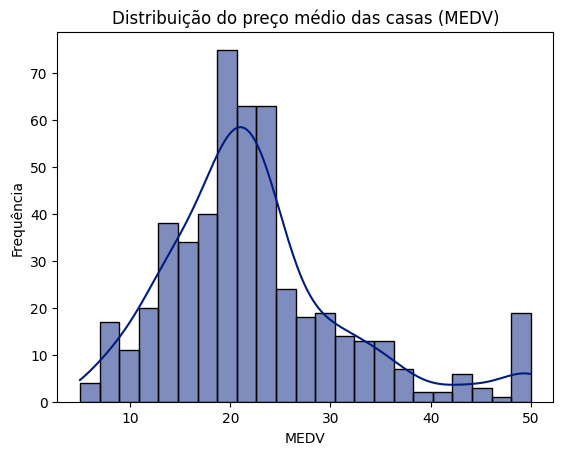

In [27]:
# Distribuição da variável MEDV
sns.histplot(df_houses['MEDV'], kde=True)
plt.title('Distribuição do preço médio das casas (MEDV)')
plt.ylabel('Frequência')
plt.show()

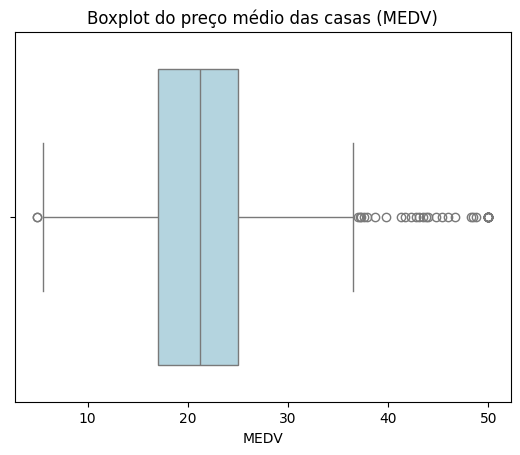

In [56]:
# Box plot variávem MEDV
sns.boxplot(x=df_houses['MEDV'], color='lightblue')
plt.title('Boxplot do preço médio das casas (MEDV)')
plt.show()

Ao verificar a distribuição dos preços médios da casas nota-se que a maioria das casas apresemtam valores avaliados entre 20.000 US$ e 25.000 US$, apresentando uma leve assimetria para a esquerda

## Verificando a relação entre o preço das casas e as variáveis

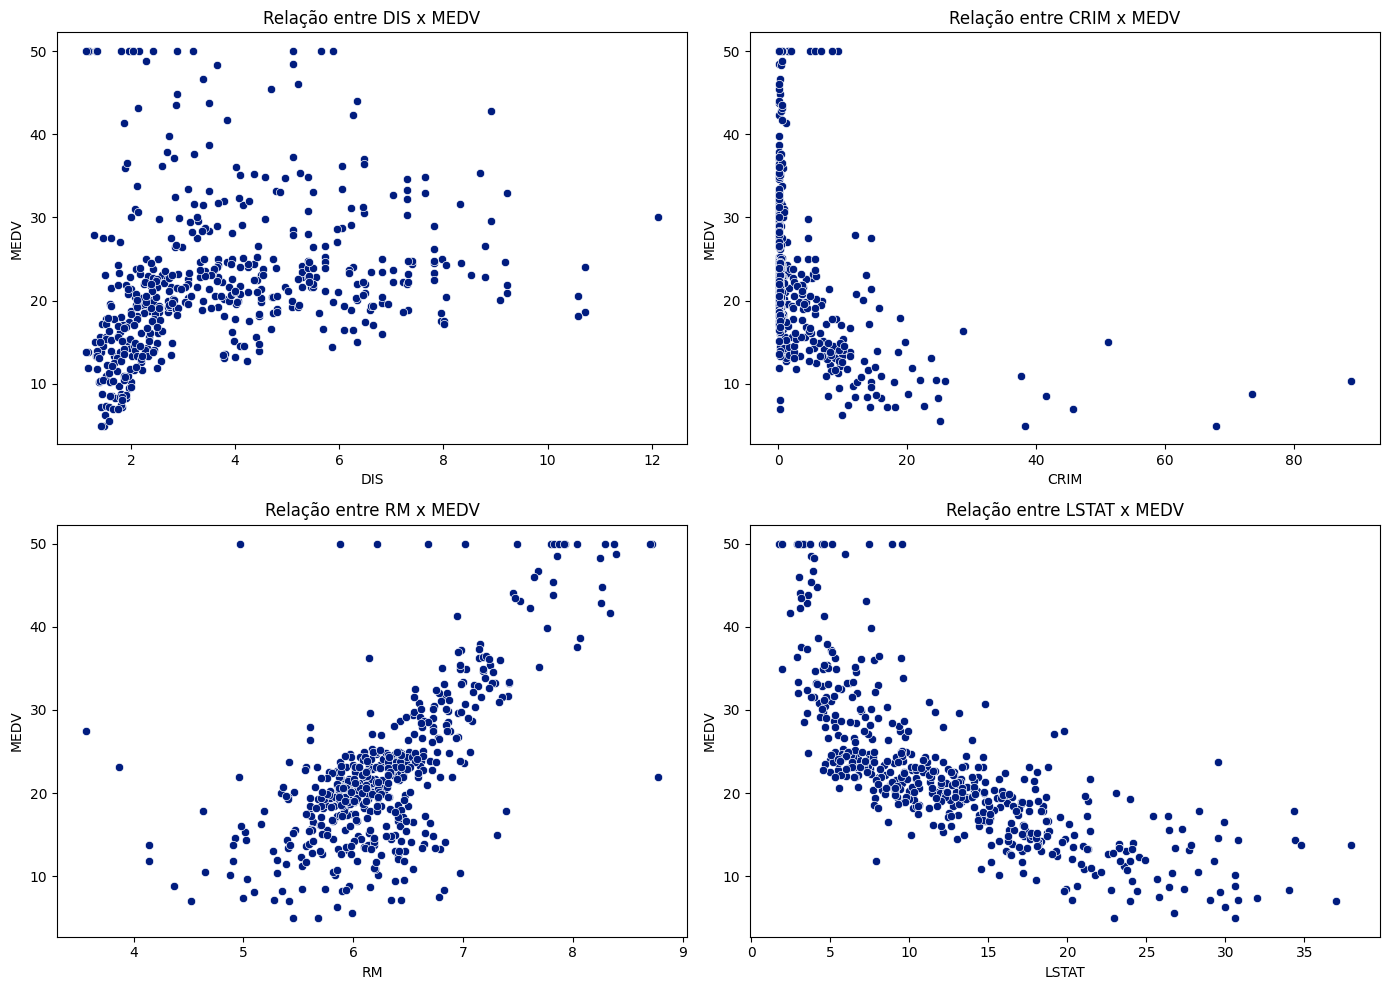

In [40]:
fig,axes = plt.subplots(2,2, figsize=(14,10))

# Relação enntre DIS e MEDV
sns.scatterplot(x='DIS', y='MEDV', data=df_houses, ax=axes[0,0])
axes[0,0].set_title('Relação entre DIS x MEDV')

# relação entre CRIM e MEDV
sns.scatterplot(x='CRIM', y='MEDV', data=df_houses, ax=axes[0,1])
axes[0,1].set_title('Relação entre CRIM x MEDV')

# RELAÇÃO ENTRE RM E MEDV
sns.scatterplot(x='RM', y='MEDV', data=df_houses, ax=axes[1,0])
axes[1,0].set_title('Relação entre RM x MEDV')

# RELAÇÃO ENTRE LSTAT e MEDV
sns.scatterplot(x='LSTAT', y='MEDV', data=df_houses, ax=axes[1,1])
axes[1,1].set_title('Relação entre LSTAT x MEDV')


plt.tight_layout()
plt.show()

RECORDANDO:
- DIS: DISTÂNCIA PONDERADAS PARA CENTROS DE EMPREGOS EM BOSTON
- CRIM: TAXA DE CRIMINALIDADE PER CAPITA
- RM: NÚMERO MÉDIO DE CÔMODOS POR MORADIA
- LSTAT: PERCENTUAL DA POPULAÇÃO EM SITUAÇÃO SOCIOECONÔNIMA BAIXA


COM OS INPUTS DOS GRÁFICOS GERADOS ACIMA PODE-SE CHEGAR AS RESPECTIVAS INTERPREÇÕES COM RELAÇÃO A VARIÁVEL DE VALOR MÉDIO DAS CASAS:

- NÃO HÁ UMA RELAÇÃO BEM DEFINIDA ENTRE AS A DISTÂNCIA PARA CENTROS DE EMPREGOS EM BOSTON OS PONTOS SE MOSTRAM DISPERSOS.
- QUANTO MAIOR É A TAXA DE CRIMINALIDADE PER CAPITA MENOR TENDE A SER O VALOR DAS MÉDIO DAS CASAS
- QUANTO MAIOR O NÚMERO MÉDIO DE CÔMODOS POR MORADIA TENDE A SER MAIOR O VALOR MÉDIO DAS CASAS
- QUANTO MAIOR O PERCENTUAL DA POPULAÇÃO EM SITUAÇÃO SOCIOECONÔMICA BAIXA MENOR TENDE A SER PREÇO MÉDIO DAS CASAS


# CORRELAÇÃO ENTRE AS VARIÁVEIS 


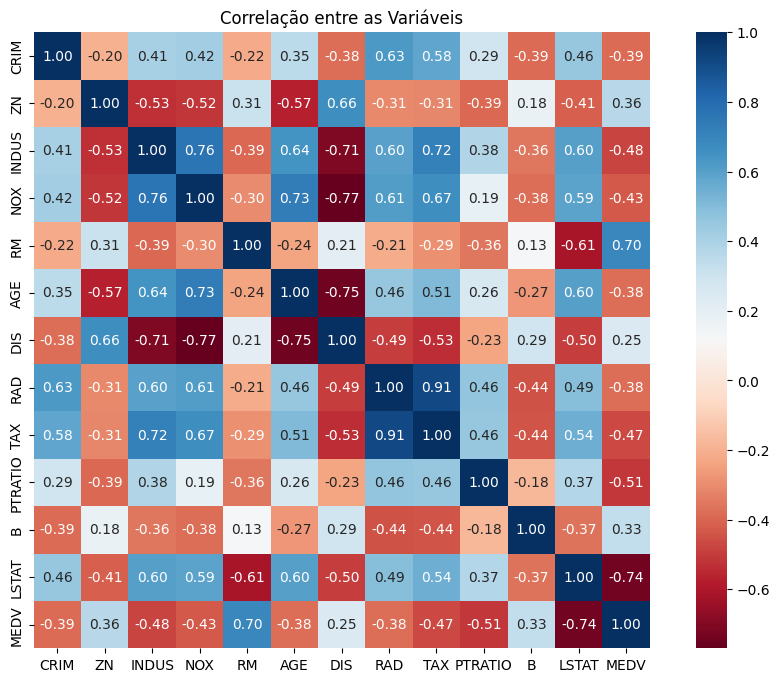

In [44]:
correlacao = df_houses.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='RdBu', square=True)
plt.title('Correlação entre as Variáveis')

plt.show()

In [47]:
correlacao = df_houses.corr()
print(correlacao['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


### Correlação
As variáveis que mais se correlacionam positivamente e negativamente para as váriável de preço médio das casas são:
- RM - Número de quartos
- PTRATIO - RAZÃO ALUNO-PROFESSOR POR CIDADE
- LSTAT  - PERCENTUAL DA POPULAÇÃO EM SITUAÇÃO SOCIOECONÔNIMA BAIXA

In [48]:
# Salvando o dataframe processado para aplicação da téncnica de Análise Fatorial e PCA
df_houses.to_csv('../data/processed/boston_houses_processed.csv', index=False)